In [2]:
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

base_donnees = pd.read_csv("Donnés\BaseDeDonnesPlusComplete2021-2025.csv")
del base_donnees["sunset_hhmm"]
del base_donnees["sunrise_hhmm"]


In [7]:
base_donnees.dtypes
base_donnees

,date,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
0,2025-05-05,23.9,15.93,16.29,8.7,NaN,NaN,78,46.9,55.0,...,NaN,NaN,8,7.1,6.5,5,NaN,NaN,NaN,NaN
1,2025-05-04,20.6,14.95,14.60,8.6,NaN,NaN,88,58.0,60.5,...,NaN,NaN,8,7.0,6.5,5,NaN,NaN,NaN,NaN
2,2025-05-03,16.5,12.29,12.60,8.7,NaN,NaN,78,62.8,62.5,...,NaN,NaN,8,6.6,5.0,2,NaN,NaN,NaN,NaN
3,2025-05-02,22.0,15.44,15.95,9.9,NaN,NaN,95,73.6,73.5,...,NaN,NaN,8,6.0,5.0,2,NaN,NaN,NaN,NaN
4,2025-05-01,16.9,10.13,9.14,1.4,NaN,NaN,76,45.8,50.5,...,NaN,NaN,8,5.1,4.5,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2021-04-01,3.8,0.40,-0.50,-4.8,NaN,-12.0,92,65.0,67.0,...,NaN,NaN,8,7.4,6.0,4,NaN,NaN,NaN,NaN
1496,2021-03-31,13.2,9.18,8.25,3.3,NaN,NaN,95,68.9,72.0,...,NaN,NaN,8,7.1,6.5,5,NaN,NaN,NaN,NaN
1497,2021-03-30,16.0,7.52,7.45,-1.1,NaN,-5.0,71,49.5,52.5,...,NaN,NaN,7,4.8,3.5,0,NaN,NaN,NaN,NaN
1498,2021-03-29,4.2,1.29,1.10,-2.0,NaN,-10.0,89,58.1,63.5,...,NaN,NaN,8,3.6,4.0,0,NaN,NaN,NaN,NaN


<Axes: >

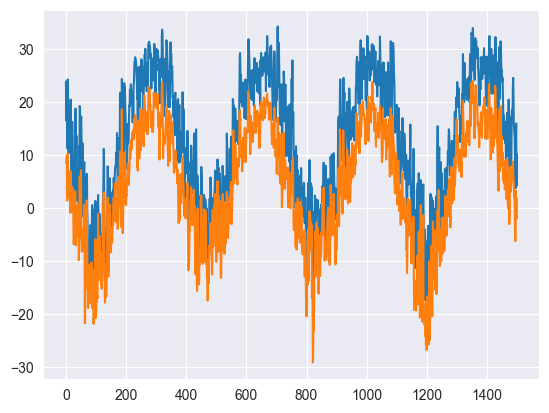

In [4]:
base_donnees['max_temperature'].plot()
base_donnees['min_temperature'].plot()

In [5]:
data = base_donnees[['date','max_temperature']]
data.dropna(inplace=True)
data.columns = ['ds','y']
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Temp\ipykernel_11088\4255116482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
0,2025-05-05,23.9
1,2025-05-04,20.6
2,2025-05-03,16.5
3,2025-05-02,22.0
4,2025-05-01,16.9


In [6]:
import os

os.makedirs("lightning_logs/version_0", exist_ok=True)

model = NeuralProphet()
model.fit(data,freq='D',epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency -1D corresponds to 99.933% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Programs\P

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (47) is too small than the required number                     for the learning rate finder (230). The results might not be optimal.

Finding best initial lr:   0%|          | 0/230 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Finding best initial lr:  18%|█▊        | 42/230 [00:00<00:02, 86.65it/s]WARNING - (py.warnings._showwarnmsg) - C:\Users\test8\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 28. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Epoch 32:   3%|▎         | 32/1000 [00:00<?, ?it/s], train_loss=0.0122, reg_loss=0.000, MAE=3.800, RMSE=4.780, Loss=0.0123, RegLoss=0.000]


KeyboardInterrupt

